In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [42]:
# ner best run in part 1
ner_data = open('telem565047.txt','rt')
ner_list = list(ner_data)
print(ner_list[:5])
ner_data.close()

pos_data = open('telem713357.txt','rt')
pos_list = list(pos_data)
print(pos_list[:5])
pos_data.close()



['./WordBindings.py 0.18 15 1 0.02\n', 'iterations\taccuracy\tavg_loss\tsecs_per_1000\n', '20000\t0.339881436708\t0.625134993901\t0.2109375\n', '40000\t0.457747297454\t0.561557215865\t0.22890625\n', '60000\t0.573520864815\t0.523037654252\t0.2234375\n']
['./WordBindings.py 0.15 400 1\n', 'iterations\taccuracy\tavg_loss\tsecs_per_1000\n', '20000\t0.849944663701\t0.900889198869\t0.3703125\n', '40000\t0.882979389839\t0.69221594273\t0.67265625\n', '60000\t0.897366827455\t0.601803308665\t0.5609375\n']


In [92]:
# ner best run in part 3
ner_data = open('telem300392.txt','rt')
ner_list = list(ner_data)
print(ner_list[:5])
ner_data.close()

pos_data = open('telem564255.txt','rt')
pos_list = list(pos_data)
print(pos_list[:5])
pos_data.close()



['WordBindings.py 0.15 15 1 ner 0.0 True False\n', 'iterations\taccuracy\tavg_loss\tsecs_per_1000\n', '20000\t0.442696876375\t0.367883288699\t0.075\n', '40000\t0.565348189415\t0.29695161836\t0.19609375\n', '60000\t0.574233825199\t0.261298171352\t0.1671875\n']
['WordBindings.py 0.15 400 1 pos 0.0 True False\n', 'iterations\taccuracy\tavg_loss\tsecs_per_1000\n', '20000\t0.839044456973\t0.899896555381\t0.41796875\n', '40000\t0.878260143248\t0.705654710317\t0.7296875\n', '60000\t0.893900478189\t0.619120419067\t0.6078125\n']


In [112]:
# ner best run in part 4 - prefix/suffix only
ner_data = open('telem402251.txt','rt')
ner_list = list(ner_data)
print(ner_list[:5])
ner_data.close()

pos_data = open('telem460917.txt','rt')
pos_list = list(pos_data)
print(pos_list[:5])
pos_data.close()



['WordBindings.py 0.15 15 1 ner 0.0 False True\n', 'iterations\taccuracy\tavg_loss\tsecs_per_1000\n', '20000\t0.160175155566\t0.50083501628\t0.2984375\n', '40000\t0.350824587706\t0.45781360736\t0.21953125\n', '60000\t0.349480203495\t0.432532634273\t0.19375\n']
['WordBindings.py 0.15 15 1 pos 0.0 False True\n', 'iterations\taccuracy\tavg_loss\tsecs_per_1000\n', '20000\t0.735701309278\t1.37379860436\t0.9359375\n', '40000\t0.79473365491\t1.16925883602\t0.23671875\n', '60000\t0.824427321514\t1.060502984\t0.1875\n']


In [118]:
# ner best run in part 4 - prefix/suffix plus embeddings
ner_data = open('telem267946.txt','rt')
ner_list = list(ner_data)
print(ner_list[:5])
ner_data.close()

pos_data = open('telem157425.txt','rt')
pos_list = list(pos_data)
print(pos_list[:5])
pos_data.close()



['WordBindings.py 0.15 15 1 ner 0.0 True True\n', 'iterations\taccuracy\tavg_loss\tsecs_per_1000\n', '20000\t0.147777651472\t0.503842906317\t0.303125\n', '40000\t0.355304648561\t0.46529595936\t0.2203125\n', '60000\t0.369928400955\t0.440847526828\t0.18203125\n']
['./WordBindings.py 0.18 300 1 pos 0.0 True True\n', 'iterations\taccuracy\tavg_loss\tsecs_per_1000\n', '20000\t0.773413518762\t1.27571998622\t1.215625\n', '40000\t0.831547954645\t1.06019991427\t0.590625\n', '60000\t0.870638351187\t0.949086060289\t0.51015625\n']


In [120]:
from collections import namedtuple
tele_tuple = namedtuple('tele',['iterations','accuracy','avg_loss','secs_per_1000'])

ner_tuples = [tele_tuple(*map(float,row.split('\t'))) for row in ner_list[2:]]

pos_tuples = [tele_tuple(*map(float,row.split('\t'))) for row in pos_list[2:]]


In [107]:
pos_tuples[:4]

[tele(iterations=20000.0, accuracy=0.839044456973, avg_loss=0.899896555381, secs_per_1000=0.41796875),
 tele(iterations=40000.0, accuracy=0.878260143248, avg_loss=0.705654710317, secs_per_1000=0.7296875),
 tele(iterations=60000.0, accuracy=0.893900478189, avg_loss=0.619120419067, secs_per_1000=0.6078125),
 tele(iterations=80000.0, accuracy=0.889410929441, avg_loss=0.567995560963, secs_per_1000=0.60390625)]

In [108]:
# graph ner data
ner_x = np.array([t.iterations for t in ner_tuples])
ner_acc = np.array([t.accuracy for t in ner_tuples])
ner_loss = np.array([t.avg_loss for t in ner_tuples])


incr = 0
curr_val = [ner_x[0]]
for i in range(0,ner_x.shape[0]-1):
    curr_val.append(ner_x[i+1])
    if curr_val[1] < curr_val[0]:
        incr = incr+220000
    ner_x[i+1] = ner_x[i+1] + incr
    curr_val.pop(0)

In [121]:
# graph pos data
pos_x = np.array([t.iterations for t in pos_tuples])
pos_acc = np.array([t.accuracy for t in pos_tuples])
pos_loss = np.array([t.avg_loss for t in pos_tuples])

incr = 0
curr_val = [pos_x[0]]
for i in range(0,pos_x.shape[0]-1):
    curr_val.append(pos_x[i+1])
    if curr_val[1] < curr_val[0]:
        incr = incr+920000
    pos_x[i+1] = pos_x[i+1] + incr
    curr_val.pop(0)

Text(0, 0.5, '% correct label')

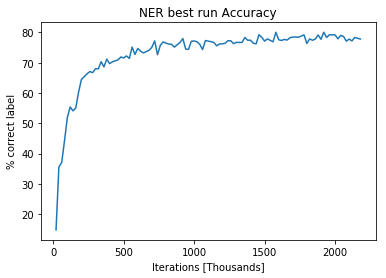

In [109]:
fig = plt.figure()
plt.plot(ner_x/1000, 100*ner_acc)
plt.title("NER best run Accuracy")
plt.xlabel("Iterations [Thousands]")
plt.ylabel("% correct label")


Text(0, 0.5, 'Avg. Negative Log-Loss')

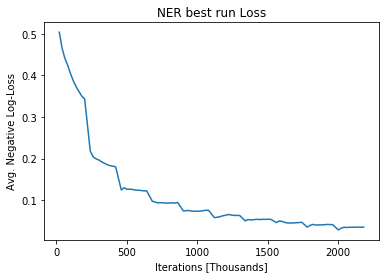

In [110]:
fig = plt.figure()
plt.plot(ner_x/1000, ner_loss)
plt.title("NER best run Loss")
plt.xlabel("Iterations [Thousands]")
plt.ylabel("Avg. Negative Log-Loss")


Text(0, 0.5, '% correct label')

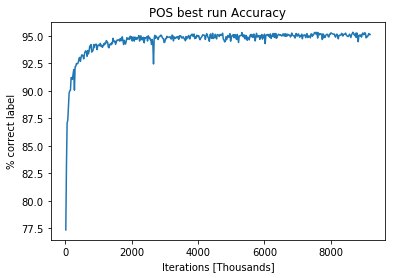

In [122]:
fig = plt.figure()
plt.plot(pos_x/1e3, 100*pos_acc)
plt.title("POS best run Accuracy")
plt.xlabel("Iterations [Thousands]")
plt.ylabel("% correct label")


Text(0, 0.5, 'Avg. Negative Log-Loss')

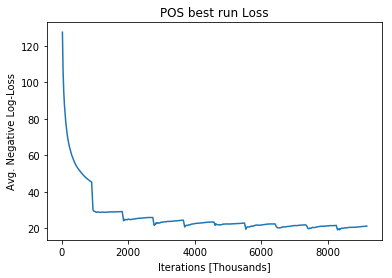

In [124]:
fig = plt.figure()
plt.plot(pos_x/1e3, 100*pos_loss)
plt.title("POS best run Loss")
plt.xlabel("Iterations [Thousands]")
plt.ylabel("Avg. Negative Log-Loss")


In [26]:
from matplotlib import __version__
__version__

'3.0.0'

In [85]:
np.diff(pos_x)


array([20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 40000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 40000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
       20000., 20000., 20000., 20000., 20000., 20000., 20000., 20000.,
      